In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('./CovidData.csv')

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.drop(columns=['MEDICAL_UNIT'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   SEX                   1048575 non-null  int64 
 2   PATIENT_TYPE          1048575 non-null  int64 
 3   DATE_DIED             1048575 non-null  object
 4   INTUBED               1048575 non-null  int64 
 5   PNEUMONIA             1048575 non-null  int64 
 6   AGE                   1048575 non-null  int64 
 7   PREGNANT              1048575 non-null  int64 
 8   DIABETES              1048575 non-null  int64 
 9   COPD                  1048575 non-null  int64 
 10  ASTHMA                1048575 non-null  int64 
 11  INMSUPR               1048575 non-null  int64 
 12  HIPERTENSION          1048575 non-null  int64 
 13  OTHER_DISEASE         1048575 non-null  int64 
 14  CARDIOVASCULAR        1048575 non-null  int64 
 15

In [5]:
df = df[(df != 97).all(axis=1)]
df = df[(df != 98).all(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80100 entries, 5 to 1048569
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   USMER                 80100 non-null  int64 
 1   SEX                   80100 non-null  int64 
 2   PATIENT_TYPE          80100 non-null  int64 
 3   DATE_DIED             80100 non-null  object
 4   INTUBED               80100 non-null  int64 
 5   PNEUMONIA             80100 non-null  int64 
 6   AGE                   80100 non-null  int64 
 7   PREGNANT              80100 non-null  int64 
 8   DIABETES              80100 non-null  int64 
 9   COPD                  80100 non-null  int64 
 10  ASTHMA                80100 non-null  int64 
 11  INMSUPR               80100 non-null  int64 
 12  HIPERTENSION          80100 non-null  int64 
 13  OTHER_DISEASE         80100 non-null  int64 
 14  CARDIOVASCULAR        80100 non-null  int64 
 15  OBESITY               80100 non-nu

In [6]:
CATEGORICAL_COLUMNS = [
    'SEX',
    'USMER',
    'PNEUMONIA',
    'DIABETES',
    'COPD',
    'ASTHMA',
    'INMSUPR',
    'HIPERTENSION',
    'OTHER_DISEASE',
    'CARDIOVASCULAR',
    'OBESITY',
    'RENAL_CHRONIC',
    'TOBACCO',
    'PREGNANT',
    'INTUBED',
    'ICU'
]

for categorical in CATEGORICAL_COLUMNS:
    df[categorical] = df[categorical].apply(lambda x: x if x == 1 else 0)

df.PATIENT_TYPE = df.PATIENT_TYPE.apply(lambda x: 0 if x == 1 else 1)
df.DATE_DIED = df.DATE_DIED.apply(lambda x: 0 if x == '9999-99-99' else 1)


In [7]:
df['COVID'] = df.DATE_DIED + df.INTUBED + df.ICU
df.COVID = df.COVID.apply(lambda x: 1 if x > 0 else 0)

In [8]:
df.drop(columns=['CLASIFFICATION_FINAL', 'DATE_DIED', 'INTUBED', 'ICU'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80100 entries, 5 to 1048569
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   USMER           80100 non-null  int64
 1   SEX             80100 non-null  int64
 2   PATIENT_TYPE    80100 non-null  int64
 3   PNEUMONIA       80100 non-null  int64
 4   AGE             80100 non-null  int64
 5   PREGNANT        80100 non-null  int64
 6   DIABETES        80100 non-null  int64
 7   COPD            80100 non-null  int64
 8   ASTHMA          80100 non-null  int64
 9   INMSUPR         80100 non-null  int64
 10  HIPERTENSION    80100 non-null  int64
 11  OTHER_DISEASE   80100 non-null  int64
 12  CARDIOVASCULAR  80100 non-null  int64
 13  OBESITY         80100 non-null  int64
 14  RENAL_CHRONIC   80100 non-null  int64
 15  TOBACCO         80100 non-null  int64
 16  COVID           80100 non-null  int64
dtypes: int64(17)
memory usage: 11.0 MB


In [10]:
train, test = train_test_split(
    df,
    test_size=0.25,
)



In [11]:
y_test = test.COVID.to_numpy()
x_test = test.drop(columns=['COVID']).to_numpy()

y_train = train.COVID.to_numpy()
x_train = train.drop(columns=['COVID']).to_numpy()


In [12]:
def get_Fmeasure(prediction, labels):
  # create a function to generate Fmeasure
  true_positive = np.sum((prediction + labels) == 2)
  false_positive = np.sum((labels - prediction) == -1)
  false_negative = np.sum((prediction - labels) == -1)
  positive = np.count_nonzero(labels == 1)
  negative = len(labels)-positive

  # Calculate F-measure
  accuracy = 100*np.sum(prediction == labels)/len(labels)
  recall = true_positive / (true_positive + false_negative)
  precision = true_positive / (true_positive + false_positive)
  eval = 2*(precision * recall) / (precision + recall)
  return eval


In [23]:
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()
gradient_boosting = GradientBoostingClassifier(learning_rate=0.2, n_estimators=150, max_depth=4, min_samples_split=2, min_samples_leaf=1)
mlp_classifier = MLPClassifier()


LOGISTIC REGRESSION

In [29]:
logistic_regression.fit(x_train, y_train)
logistic_score = logistic_regression.score(x_test, y_test)

Random Forest Classifier

In [30]:
random_forest.fit(x_train, y_train)
random_forest_score = random_forest.score(x_test, y_test)

Decision Tree Classifier

In [31]:
decision_tree.fit(x_train, y_train)
decision_tree_score = decision_tree.score(x_test, y_test)

GRADIENT BOOST

In [32]:
gradient_boosting.fit(x_train, y_train)
gradient_boost_score = gradient_boosting.score(x_test, y_test)

MLP Classifier

In [18]:
mlp_classifier.fit(x_train, y_train)
mlp_classifier_score = mlp_classifier.score(x_test, y_test)

In [25]:
algorithm = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'MLP Classifier']
scores = [logistic_score, random_forest_score, decision_tree_score, gradient_boost_score, mlp_classifier_score]

algo_score = pd.DataFrame({'Algorithm': algorithm, 'Score': scores})
# sort by score
algo_score.sort_values(by='Score', ascending=False, inplace=True)

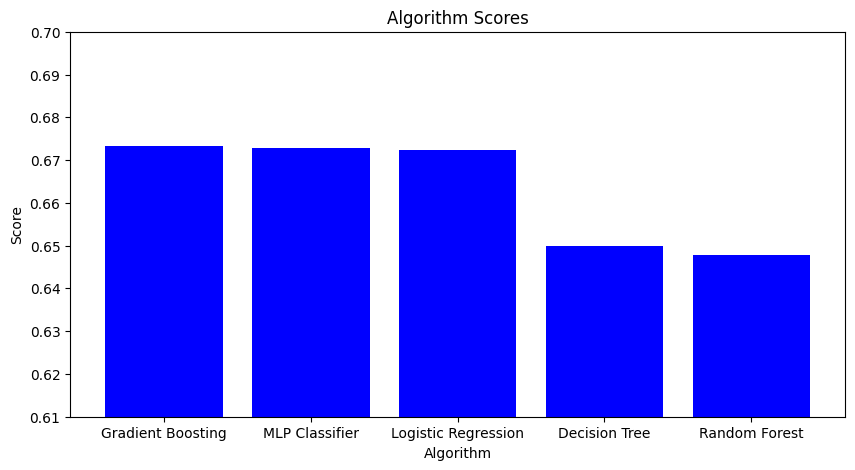

In [26]:
# Draw a plot of the algorithm scores
plt.figure(figsize=(10, 5))
plt.title('Algorithm Scores')
plt.xlabel('Algorithm')
plt.ylabel('Score')
# 2 decimal places
plt.bar(algo_score['Algorithm'], algo_score['Score'], color='blue')
plt.ylim(0.61, 0.70)
plt.show()


In [27]:
# Predict the test set
logistic_prediction = logistic_regression.predict(x_test)
decision_tree_prediction = decision_tree.predict(x_test)
random_forest_prediction = random_forest.predict(x_test)
gradient_boosting_prediction = gradient_boosting.predict(x_test)
mlp_classifier_prediction = mlp_classifier.predict(x_test)

f_measure = {}
f_measure['Logistic Regression'] = get_Fmeasure(logistic_prediction, y_test)
f_measure['Decision Tree'] = get_Fmeasure(decision_tree_prediction, y_test)
f_measure['Random Forest'] = get_Fmeasure(random_forest_prediction, y_test)
f_measure['Gradient Boosting'] = get_Fmeasure(gradient_boosting_prediction, y_test)
f_measure['MLP Classifier'] = get_Fmeasure(mlp_classifier_prediction, y_test)

# sort by score
f_measure = sorted(f_measure.items(), key=lambda x: x[1], reverse=True)


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

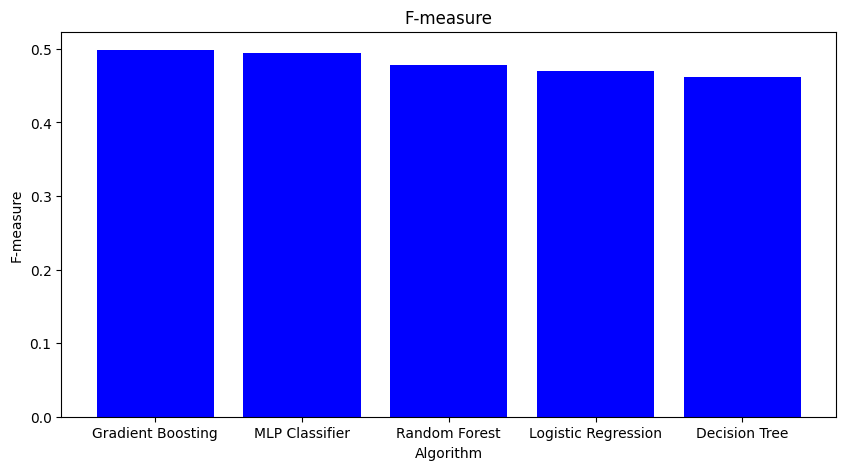

In [28]:
plt.figure(figsize=(10, 5))
plt.title('F-measure')
plt.xlabel('Algorithm')
plt.ylabel('F-measure')
plt.bar([x[0] for x in f_measure], [x[1] for x in f_measure], color='blue')
plt.show()